# Gradient Descent for Multilinear regression from scratch...
### Step by step process.....

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [18]:

from sklearn.datasets import load_boston
boston = load_boston()

X = boston.data

print('Data shape :', X.shape)
Y = boston.target
print('Target shape : ', Y.shape)

Data shape : (506, 13)
Target shape :  (506,)


## Step 1 : Normalize the data 

In [5]:

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_transform=sc.fit_transform(X)

## Step 2 : Initialize the parameters:

In [ ]:

weight_vector=np.random.randn(x.shape[1])
intercept=0
learning_rate = 0.001


## Step 3 : Find derivatives of loss w.r.t weight and bias.



In [6]:

# Define the LOSS function ....

def loss(y,y_predicted):
    n=len(y)
    s=0
    for i in range(n):
        s+=(y[i]-y_predicted[i])**2
    return (1/n)*s


In [8]:
# code for "wx+b"
def predicted_y(weight,x,intercept):
    y_lst=[]
    for i in range(len(x)):
        y_lst.append(weight@x[i]+intercept) #dot product btween weight and input
    return np.array(y_lst)

In [9]:
#derivative of loss w.r.t weight 
def dldw(x,y,y_predicted):
    s=0
    n=len(y)
    for i in range(n):
        s+=-x[i]*(y[i]-y_predicted[i])
    return (2/n)*s

In [10]:
# derivative of loss w.r.t bias
def dldb(y,y_predicted):
    n=len(y)
    s=0
    for i in range(len(y)):
        s+=-(y[i]-y_predicted[i])
    return (2/n) * s

# Step 4: Update the weight and bias till we get the global minima.
        

In [19]:
# gradient function
def gradient_descent(x,y):
    
    weight_vector=np.random.randn(x.shape[1])
    intercept=0
    epoch = 2000
    
    n = len(x)
    linear_loss=[]
    learning_rate = 0.001

    for i in range(epoch):
        
        
        y_predicted = predicted_y(weight_vector,x,intercept)
        
        weight_vector = weight_vector - learning_rate *dldw(x,y,y_predicted) 
        
        
        intercept = intercept - learning_rate * dldb(y,y_predicted)
        linear_loss.append(loss(y,y_predicted))
        
    plt.plot(np.arange(1,epoch),linear_loss[1:])
    plt.xlabel("number of epoch")
    plt.ylabel("loss")
    
    return weight_vector,intercept

weight: [-0.69405149  0.95246243 -0.78230461  0.83724316 -0.69299337  3.31262088
 -0.54731133 -2.76620466  0.4949797  -0.48465068 -1.4177715   0.82357716
 -3.14860427]
bias: 22.12175328966187


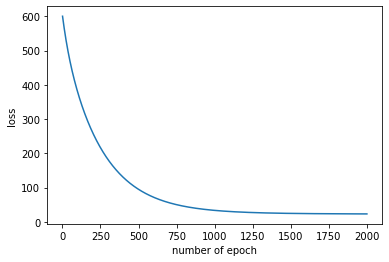

In [22]:
w,b=gradient_descent(X_transform,Y)

print("weight:",w)
print("bias:",b)

# Prediction

In [23]:
def predict(inp):
    y_lst=[]
    for i in range(len(inp)):
        y_lst.append(w@inp[i]+b)
    return np.array(y_lst)

In [ ]:
y_pred=predict(X_transform)
y_pred

In [25]:
df_pred=pd.DataFrame()
df_pred["y_actual"]=Y
df_pred["y_predicted"]=np.round(y_pred,1)
df_pred

,y_actual,y_predicted
0,24.0,30.3
1,21.6,24.0
2,34.7,30.2
3,33.4,28.8
4,36.2,28.3
...,...,...
501,22.4,24.6
502,20.6,22.7
503,23.9,28.2
504,22.0,26.7


In [32]:
from sklearn import metrics
import numpy as np

print('Mean Absulute Error (MAE) :',metrics.mean_absolute_error(Y,y_pred))
print('Mean Squared Error (MSE) :',metrics.mean_squared_error(Y,y_pred))
print('Root Mean Squared Error (RMSE) :', np.sqrt(metrics.mean_squared_error(Y,y_pred)))

Mean Absulute Error (MAE) : 3.214652028747976
Mean Squared Error (MSE) : 23.194300982280378
Root Mean Squared Error (RMSE) : 4.81604619810487


# GD regression with Sklearn .. 

In [26]:
from sklearn.linear_model import SGDRegressor
model=SGDRegressor(alpha=0,learning_rate="constant",eta0=0.001)
model.fit(X_transform,Y)

SGDRegressor(alpha=0, eta0=0.001, learning_rate='constant')

In [27]:
model.intercept_

array([22.53316929])

In [28]:
model.coef_

array([-0.82002852,  0.90660424, -0.15462804,  0.75882013, -1.76805424,
        2.77371282, -0.03211019, -2.97332622,  1.80609185, -1.07930039,
       -1.98812914,  0.84357959, -3.66979102])

# Compare the weights with previous learned weights....

In [30]:
w

array([-0.69405149,  0.95246243, -0.78230461,  0.83724316, -0.69299337,
        3.31262088, -0.54731133, -2.76620466,  0.4949797 , -0.48465068,
       -1.4177715 ,  0.82357716, -3.14860427])